In [1]:
from qiskit import *
from numpy import *

In [2]:
Q= int(input(" Enter the number of qubits: "))
circuit = QuantumCircuit(Q,Q)
n=Q

#Creating GHZ Entalment
circuit.h(0)

for x in range(1,n):
    circuit.cx(0,x)

while(n!=0):
    circuit.h(n-1)
    for qubit in range(0,n-1):
        circuit.cp(pi/2**(n-qubit), qubit, n-1)
    n -= 1



circuit.draw()

┌───┐                                                                     »
q_0: ┤ H ├──■────■────■────■────■────────■─────────────────────────────────────»
     └───┘┌─┴─┐  │    │    │    │        │                                     »
q_1: ─────┤ X ├──┼────┼────┼────┼────────┼─────────■───────────────────────────»
          └───┘┌─┴─┐  │    │    │        │         │                           »
q_2: ──────────┤ X ├──┼────┼────┼────────┼─────────┼─────────■─────────────────»
               └───┘┌─┴─┐  │    │        │         │         │                 »
q_3: ───────────────┤ X ├──┼────┼────────┼─────────┼─────────┼─────────■───────»
                    └───┘┌─┴─┐  │        │         │         │         │       »
q_4: ────────────────────┤ X ├──┼────────┼─────────┼─────────┼─────────┼───────»
                         └───┘┌─┴─┐┌───┐ │P(π/64)  │P(π/32)  │P(π/16)  │P(π/8) »
q_5: ─────────────────────────┤ X ├┤ H ├─■─────────■─────────■─────────■───────»
                              └───┘└───┘                                       »
c: 6/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«                                                                        »
«q_0: ───────────────■──────────────────────────────────────────■────────»
«                    │                                          │        »
«q_1: ───────────────┼─────────■────────────────────────────────┼────────»
«                    │         │                                │        »
«q_2: ───────────────┼─────────┼─────────■──────────────────────┼────────»
«                    │         │         │                ┌───┐ │P(π/16) »
«q_3: ───────────────┼─────────┼─────────┼────────■───────┤ H ├─■────────»
«              ┌───┐ │P(π/32)  │P(π/16)  │P(π/8)  │P(π/4) └───┘          »
«q_4: ─■───────┤ H ├─■─────────■─────────■────────■──────────────────────»
«      │P(π/4) └───┘                                                     »
«q_5: ─■─────────────────────────────────────────────────────────────────»
«                                                                        »
«c: 6/═══════════════════════════════════════════════════════════════════»
«                                                                        »
«                                                            ┌───┐
«q_0: ────────────────────────■──────────────────────■───────┤ H ├
«                             │                ┌───┐ │P(π/4) └───┘
«q_1: ─■──────────────────────┼────────■───────┤ H ├─■────────────
«      │                ┌───┐ │P(π/8)  │P(π/4) └───┘              
«q_2: ─┼────────■───────┤ H ├─■────────■──────────────────────────
«      │P(π/8)  │P(π/4) └───┘                                     
«q_3: ─■────────■─────────────────────────────────────────────────
«                                                                 
«q_4: ────────────────────────────────────────────────────────────
«                                                                 
«q_5: ────────────────────────────────────────────────────────────
«                                                                 
«c: 6/════════════════════════════════════════════════════════════
«

In [3]:
for qubit in range(Q//2):
    circuit.swap(qubit, n-qubit-1)

circuit.draw()

┌───┐                                                                     »
q_0: ┤ H ├──■────■────■────■────■────────■─────────────────────────────────────»
     └───┘┌─┴─┐  │    │    │    │        │                                     »
q_1: ─────┤ X ├──┼────┼────┼────┼────────┼─────────■───────────────────────────»
          └───┘┌─┴─┐  │    │    │        │         │                           »
q_2: ──────────┤ X ├──┼────┼────┼────────┼─────────┼─────────■─────────────────»
               └───┘┌─┴─┐  │    │        │         │         │                 »
q_3: ───────────────┤ X ├──┼────┼────────┼─────────┼─────────┼─────────■───────»
                    └───┘┌─┴─┐  │        │         │         │         │       »
q_4: ────────────────────┤ X ├──┼────────┼─────────┼─────────┼─────────┼───────»
                         └───┘┌─┴─┐┌───┐ │P(π/64)  │P(π/32)  │P(π/16)  │P(π/8) »
q_5: ─────────────────────────┤ X ├┤ H ├─■─────────■─────────■─────────■───────»
                              └───┘└───┘                                       »
c: 6/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«                                                                        »
«q_0: ───────────────■──────────────────────────────────────────■────────»
«                    │                                          │        »
«q_1: ───────────────┼─────────■────────────────────────────────┼────────»
«                    │         │                                │        »
«q_2: ───────────────┼─────────┼─────────■──────────────────────┼────────»
«                    │         │         │                ┌───┐ │P(π/16) »
«q_3: ───────────────┼─────────┼─────────┼────────■───────┤ H ├─■────────»
«              ┌───┐ │P(π/32)  │P(π/16)  │P(π/8)  │P(π/4) └───┘          »
«q_4: ─■───────┤ H ├─■─────────■─────────■────────■──────────────────────»
«      │P(π/4) └───┘                                                     »
«q_5: ─■─────────────────────────────────────────────────────────────────»
«                                                                        »
«c: 6/═══════════════════════════════════════════════════════════════════»
«                                                                        »
«                                                            ┌───┐   
«q_0: ────────────────────────■──────────────────────■───────┤ H ├─X─
«                             │                ┌───┐ │P(π/4) └───┘ │ 
«q_1: ─■──────────────────────┼────────■───────┤ H ├─■─────────X───┼─
«      │                ┌───┐ │P(π/8)  │P(π/4) └───┘           │   │ 
«q_2: ─┼────────■───────┤ H ├─■────────■─────────X─────────────┼───┼─
«      │P(π/8)  │P(π/4) └───┘                    │             │   │ 
«q_3: ─■────────■────────────────────────────────X─────────────┼───┼─
«                                                              │   │ 
«q_4: ─────────────────────────────────────────────────────────X───┼─
«                                                                  │ 
«q_5: ─────────────────────────────────────────────────────────────X─
«                                                                    
«c: 6/═══════════════════════════════════════════════════════════════
«

In [4]:
circuit.measure(range(Q),range(Q))

circuit.draw()

┌───┐                                                                     »
q_0: ┤ H ├──■────■────■────■────■────────■─────────────────────────────────────»
     └───┘┌─┴─┐  │    │    │    │        │                                     »
q_1: ─────┤ X ├──┼────┼────┼────┼────────┼─────────■───────────────────────────»
          └───┘┌─┴─┐  │    │    │        │         │                           »
q_2: ──────────┤ X ├──┼────┼────┼────────┼─────────┼─────────■─────────────────»
               └───┘┌─┴─┐  │    │        │         │         │                 »
q_3: ───────────────┤ X ├──┼────┼────────┼─────────┼─────────┼─────────■───────»
                    └───┘┌─┴─┐  │        │         │         │         │       »
q_4: ────────────────────┤ X ├──┼────────┼─────────┼─────────┼─────────┼───────»
                         └───┘┌─┴─┐┌───┐ │P(π/64)  │P(π/32)  │P(π/16)  │P(π/8) »
q_5: ─────────────────────────┤ X ├┤ H ├─■─────────■─────────■─────────■───────»
                              └───┘└───┘                                       »
c: 6/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«                                                                        »
«q_0: ───────────────■──────────────────────────────────────────■────────»
«                    │                                          │        »
«q_1: ───────────────┼─────────■────────────────────────────────┼────────»
«                    │         │                                │        »
«q_2: ───────────────┼─────────┼─────────■──────────────────────┼────────»
«                    │         │         │                ┌───┐ │P(π/16) »
«q_3: ───────────────┼─────────┼─────────┼────────■───────┤ H ├─■────────»
«              ┌───┐ │P(π/32)  │P(π/16)  │P(π/8)  │P(π/4) └───┘          »
«q_4: ─■───────┤ H ├─■─────────■─────────■────────■──────────────────────»
«      │P(π/4) └───┘                                                     »
«q_5: ─■─────────────────────────────────────────────────────────────────»
«                                                                        »
«c: 6/═══════════════════════════════════════════════════════════════════»
«                                                                        »
«                                                            ┌───┐            »
«q_0: ────────────────────────■──────────────────────■───────┤ H ├────X───────»
«                             │                ┌───┐ │P(π/4) └───┘    │ ┌─┐   »
«q_1: ─■──────────────────────┼────────■───────┤ H ├─■─────────────X──┼─┤M├───»
«      │                ┌───┐ │P(π/8)  │P(π/4) └───┘   ┌─┐         │  │ └╥┘   »
«q_2: ─┼────────■───────┤ H ├─■────────■─────────X─────┤M├─────────┼──┼──╫────»
«      │P(π/8)  │P(π/4) └───┘                    │     └╥┘    ┌─┐  │  │  ║    »
«q_3: ─■────────■────────────────────────────────X──────╫─────┤M├──┼──┼──╫────»
«                                                       ║     └╥┘  │  │  ║ ┌─┐»
«q_4: ──────────────────────────────────────────────────╫──────╫───X──┼──╫─┤M├»
«                                                       ║      ║      │  ║ └╥┘»
«q_5: ──────────────────────────────────────────────────╫──────╫──────X──╫──╫─»
«                                                       ║      ║         ║  ║ »
«c: 6/══════════════════════════════════════════════════╩══════╩═════════╩══╩═»
«                                                       2      3         1  4 »
«     ┌─┐   
«q_0: ┤M├───
«     └╥┘   
«q_1: ─╫────
«      ║    
«q_2: ─╫────
«      ║    
«q_3: ─╫────
«      ║    
«q_4: ─╫────
«      ║ ┌─┐
«q_5: ─╫─┤M├
«      ║ └╥┘
«c: 6/═╩══╩═
«      0  5

In [5]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1024)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'110110': 1, '000110': 1, '101110': 8, '011010': 23, '011110': 11, '111110': 16, '001010': 3, '001100': 1, '101000': 19, '010100': 6, '000111': 19, '111000': 20, '000010': 17, '110100': 20, '100100': 18, '110101': 1, '001111': 31, '110001': 44, '011101': 21, '000000': 42, '010110': 27, '010001': 10, '010111': 22, '001101': 21, '101011': 7, '110010': 20, '100101': 31, '000001': 11, '101010': 26, '101100': 28, '100111': 10, '000100': 17, '001001': 2, '011011': 26, '001011': 19, '010010': 4, '010000': 5, '100110': 41, '101101': 7, '110011': 4, '111111': 39, '111011': 10, '100010': 16, '001000': 9, '111010': 1, '100011': 24, '101001': 30, '110000': 29, '010101': 32, '010011': 31, '011001': 33, '110111': 15, '001110': 21, '111001': 1, '100001': 15, '011000': 11, '111101': 12, '101111': 5, '011100': 30}


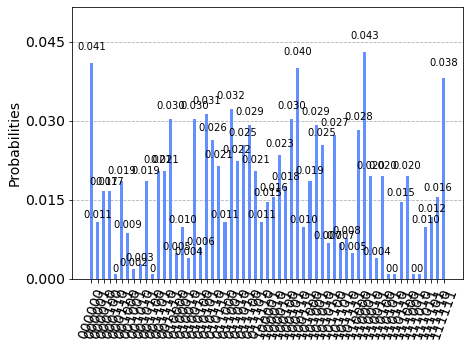

In [6]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)